In [1]:
from mido import MidiFile

mid = MidiFile('content/let-it-be-80.mid')

In [7]:
from mido import tempo2bpm
import numpy as np
time=0
currentTempo=500000
tickPerBeat=mid.ticks_per_beat
notes=np.zeros((100),np.int32)
# An array to store notes from 0 to 60 s 
Y=np.zeros((100,300*10),np.int32)
print(Y.shape)

lastIndexTime=0

for i, track in enumerate(mid.tracks):
    print('Track {}: {}'.format(i, track.name))
    totalticks=0
    for msg in track:
        note=-1
        if not msg.is_meta:
            if msg.type=='note_on':
                totalticks=totalticks+msg.time
                if msg.channel!=9:
                    if msg.velocity==0:
                        note=msg.note
                        notes[note]=0
                    else:
                        note=msg.note
                        notes[note]=1
        elif msg.type=='time_signature':
            print(msg)
        elif msg.type=='set_tempo':
            currentTempo=msg.tempo
            print(totalticks,msg)
        time=time+msg.time*currentTempo/tickPerBeat
        #print(time)
        indextime=int(time*10//1000000)
        #print(indextime)
        #print("saut",indextime-lastIndexTime)
        if note>-1:
            Y[note,indextime]=1
        if (indextime-lastIndexTime)>1:
            #print("saut de",lastIndexTime,"à",indextime)
            for i in range(lastIndexTime+1,indextime):
                #print("copie de", i-1,"vers",i)
                Y[:,i]=Y[:,i-1]
            
        lastIndexTime=indextime
        
  #      if time>208000000 and time<208200000:
  #          print(np.where(notes))
            
print("Temps total",time/1000000/60//1,time/1000000/60%1*60)



(100, 3000)
Track 0: 
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
0 MetaMessage('set_tempo', tempo=857142, time=0)
23869 MetaMessage('set_tempo', tempo=895522, time=19)
23994 MetaMessage('set_tempo', tempo=952380, time=4)
24086 MetaMessage('set_tempo', tempo=1000000, time=19)
24163 MetaMessage('set_tempo', tempo=1153846, time=15)
Temps total 4.0 20.068088562499895


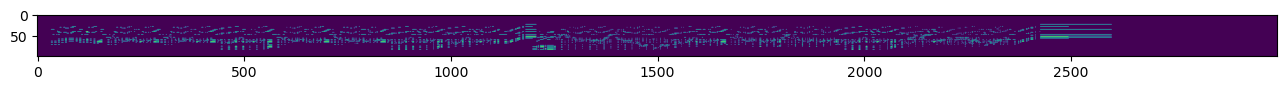

In [8]:
import re
import matplotlib.pyplot as plt
import pandas as pd

X=np.load("content/billyjean.npy")
plt.rcParams['figure.figsize'] = [16, 5]
plt.imshow(Y)
